# Salary Project 

Problem Statement: 
Predict the salary if the employee using the features provided in the data. 

Data Source: 
https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv   

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("salarydata.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

Note: The variables like rank, discipline, and sex are in form of object. We need to change this further into float data type. 

In [5]:
df.sample(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
32,Prof,B,13,9,Male,117256
382,AssocProf,A,8,5,Male,86895
125,Prof,A,54,49,Male,78162
179,AsstProf,B,3,3,Female,92000
10,AssocProf,B,12,8,Male,119800


In [6]:
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [7]:
df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

<AxesSubplot:xlabel='rank', ylabel='count'>

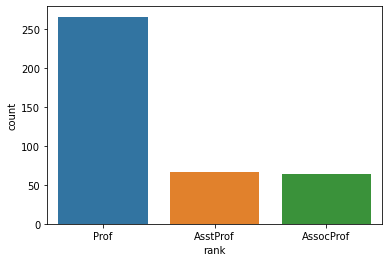

In [8]:
sns.countplot(df['rank'])

In [9]:
df['discipline'].unique()

array(['B', 'A'], dtype=object)

In [10]:
df['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

<AxesSubplot:xlabel='discipline', ylabel='count'>

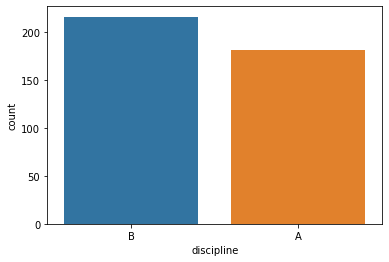

In [11]:
sns.countplot(df['discipline'])

In [12]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
df['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

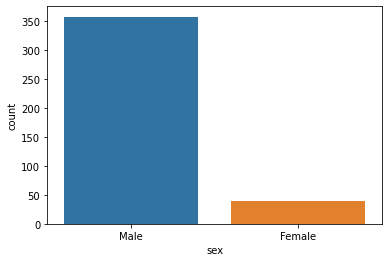

In [14]:
sns.countplot(df['sex'])

Observation: The data is not balanced. The varaibles like sex, discipline, and rank carries unbalanced data. It needs to be cured with SMOTE technique. 

In [15]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


<AxesSubplot:>

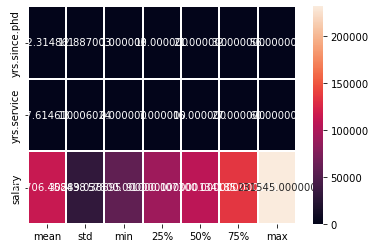

In [18]:
sns.heatmap(df.describe()[1:].transpose(), linewidth = 2, annot = True, fmt = 'f')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [20]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

<AxesSubplot:ylabel='Density'>

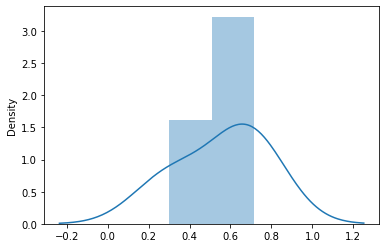

In [21]:
sns.distplot(df.skew())

Observation: The data is quite normally distributed and holds the bell-shaped curve. 

In [22]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [24]:
df.corr()['salary'].sort_values(ascending = True)

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

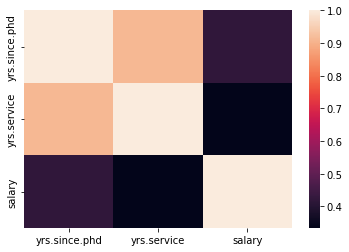

In [23]:
sns.heatmap(df.corr())

Observation: The data is not much correlated with the salary variable. It is weekly correlated. 

# Preprocessing Data 

In [25]:
#Transforming the datatype == object into float datatype for more efficent training of the model. 

In [26]:
enc = OrdinalEncoder()
for i in df.columns: 
    if df[i].dtypes == "object": 
        df['i'] = enc.fit_transform(df[i].values.reshape(-1,1))

In [29]:
le = LabelEncoder()
list = ['rank', 'discipline', 'sex']
for val in list: 
    df[val] = le.fit_transform(df[val].astype(str))

In [31]:
df.dtypes

rank               int32
discipline         int32
yrs.since.phd      int64
yrs.service        int64
sex                int32
salary             int64
i                float64
dtype: object

In [30]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary,i
0,2,1,19,18,1,139750,1.0
1,2,1,20,16,1,173200,1.0
2,1,1,4,3,1,79750,1.0
3,2,1,45,39,1,115000,1.0
4,2,1,40,41,1,141500,1.0
...,...,...,...,...,...,...,...
392,2,0,33,30,1,103106,1.0
393,2,0,31,19,1,150564,1.0
394,2,0,42,25,1,101738,1.0
395,2,0,25,15,1,95329,1.0


In [32]:
df['i'].unique()

array([1., 0.])

In [33]:
#Checking the outliers in the dataset. If outliers do exsist, removing it with zscore function.  
from scipy.stats import zscore 
z = zscore(df)

In [34]:
df_new = df[(z<3).all(axis =1)]

In [35]:
df_new.shape

(393, 7)

In [36]:
df.shape

(397, 7)

In [37]:
df = df_new

In [39]:
#Checking the skewness in the dataset. Power transform technique will be used for the same. 

In [71]:
x = df.iloc[:,0:-4]
y = df.iloc[:,6]

In [73]:
from sklearn.preprocessing import power_transform
x = power_transform(x)

In [74]:
type(x)

numpy.ndarray

In [75]:
x.mean()

-2.290129258599135e-16

<AxesSubplot:ylabel='Density'>

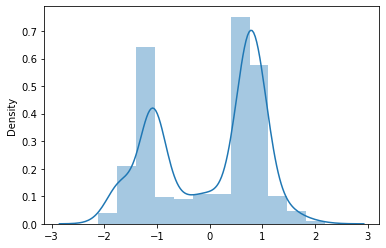

In [76]:
sns.distplot(x)

# Model Selection 

In [72]:
trainx, testx, trainy, testy = train_test_split(x,y,test_size = 0.5, random_state = 45)

In [77]:
len(x) 

393

In [78]:
len(y)

393

In [79]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
trainx, trainy = smt.fit_resample(x,y)

In [80]:
trainx.shape

(708, 3)

In [81]:
trainy.shape

(708,)

# Making an instance. 

In [85]:
lr = LinearRegression()
lr.fit(trainx, trainy)

LinearRegression()

In [86]:
lr.score(trainx, trainy)

0.06592514125535598

In [87]:
pred = lr.predict(testx)

In [88]:
mean_squared_error(testy, pred)

3.285293533553546

In [89]:
mean_absolute_error(testy, pred)

1.5250426300193862

In [90]:
r2_score(testy, pred)

-30.85880978102939

In [98]:
#Lasso Regularization 

ls = Lasso(alpha = 0.00001)
ls.fit(trainx, trainy)

Lasso(alpha=1e-05)

In [99]:
ls.score(trainx, trainy)

0.06592514019837381

In [101]:
lspred = ls.predict(testx)

In [102]:
mean_squared_error(testy, lspred)

3.28414260538936

In [103]:
mean_absolute_error(testy, lspred)

1.524765359013152

In [104]:
r2_score(testy, lspred)

-30.84764876875455

In [105]:
from sklearn.svm import SVR 
svr = SVR(kernel = "linear")
svr.fit(trainx, trainy)

SVR(kernel='linear')

In [106]:
svr.score(trainx,trainy)

-0.18413340229185704

In [107]:
svr.predict(testx)

array([3.7039109 , 2.04732284, 2.94149644, 4.24190407, 3.13210006,
       4.27572174, 5.22873982, 4.14660226, 4.37102355, 3.19358419,
       4.14660226, 3.13210006, 5.22610015, 1.76273725, 5.0381362 ,
       4.05130046, 2.84619463, 4.65692897, 3.13210006, 2.46234774,
       2.90767877, 1.32004589, 4.37102355, 3.95599865, 5.13343801,
       1.38153002, 1.66611561, 4.52516983, 4.14660226, 4.56162716,
       1.60595131, 3.09828238, 2.33586793, 4.14660226, 1.79523509,
       1.66743544, 1.32004589, 1.22474408, 1.57213364, 2.75089283,
       4.84753259, 4.81371491, 2.3696856 , 1.38021019, 2.46234774,
       5.32404162, 3.89451451, 2.43116973, 4.90637706, 1.66611561,
       3.288886  , 1.38153002, 1.32004589, 4.90901672, 1.66611561,
       5.86203479, 3.03679825, 3.22740186, 5.51464524, 2.46498741,
       4.05130046, 4.52780949, 1.32004589, 1.70125311, 3.09828238,
       4.75223078, 2.65559102, 5.0381362 , 3.09828238, 4.14660226,
       4.71841311, 1.22342425, 1.32004589, 3.89451451, 3.70391

In [108]:
mean_squared_error(testy, svr.predict(testx))

6.960191049835492

In [117]:
#Gradient Descent (SDG Classifier)

In [116]:
SGDClf = SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")

In [119]:
SGDClf.fit(trainx, trainy)

SGDClassifier(penalty='elasticnet')

In [121]:
SGDClf.score(trainx, trainy)

0.5070621468926554

In [122]:
p = SGDClf.predict(testx)

In [123]:
mean_squared_error(testy, p)

0.116751269035533

In [124]:
mean_absolute_error(testy, p)

0.116751269035533

In [125]:
r2_score(testy, p)

-0.13218390804597746

# ROC AUC Plot

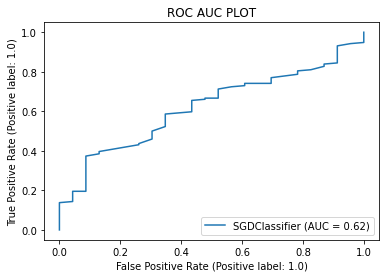

In [128]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(SGDClf.fit(trainx, trainy), testx, testy)
plt.title("ROC AUC PLOT")
plt.show()